<a href="https://colab.research.google.com/github/kovyakov/Sketchbook/blob/master/Aula_02_Parsing_R_Bloggers_(Full).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
 def get_r_bloggers(page):
  url = f'https://www.r-bloggers.com/page/{page}/'
  print(f"Downloading {url}")
  response = requests.get(url)
  soup = BeautifulSoup(response.content, "html.parser")
  titles = []
  h3_list = soup.find_all("h3") #Todos os titulos da pagina tem formato h3...
  for h3 in h3_list:
    titles.append(h3.text)
  return titles

In [ ]:
titles = []
for page in range(1,11):
  titles.extend(get_r_bloggers(page))
titles = [t.lower() for t in titles]

In [ ]:
!pip install wordcloud nltk

In [ ]:
import nltk
nltk.download ('punkt')
nltk.download ('stopwords')

def get_words (text):
  text = text.lower().strip()
  tokens = nltk.word_tokenize(text)
  words = [token for token in tokens if token.isalpha()]
  return " ".join(words)

titles = [get_words(t) for t in titles]

(-0.5, 799.5, 799.5, -0.5)

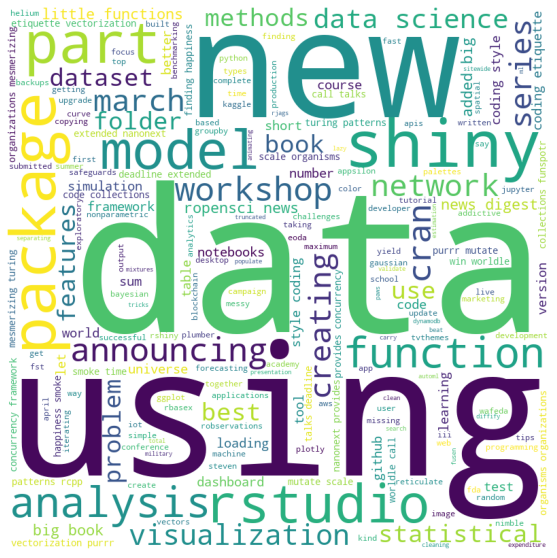

In [11]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stopwords_en = nltk.corpus.stopwords.words("english")
fig, ax = plt.subplots(1,1, figsize=(10,10))
wordcloud = WordCloud(stopwords = stopwords_en,
                      height = 800,
                      width = 800,
                      background_color = "white").generate(" ".join(titles))
ax.imshow(wordcloud)
ax.axis("off")

In [12]:
def get_r_bloggers_links(page):
  url = f'https://www.r-bloggers.com/page/{page}/'
  print(f"Downloading {url}")
  response = requests.get(url)
  soup = BeautifulSoup(response.content, "html.parser")
  links = []
  h3_list = soup.find_all("h3")
  for h3 in h3_list:
    links.append(h3.a.attrs['href'])
  return links

In [ ]:
links = []
for page in range(1, 11):
  links.extend(get_r_bloggers_links(page))
links

In [ ]:
#Bibiloteca para (...)
!pip install newspaper3k

In [20]:
from newspaper import Article

In [37]:
def get_texts(url):
  article = Article(url)
  article.download()
  article.parse()
  return article.text

texts = [get_texts(url) for url in links]

In [ ]:
#Caso der erro, pode fazer
#def get_texts(url):
#  try:
#    article = Article(url)
#    article.download()
#    article.parse()
#    text = article.text
#  except:
#    text = "Erro"
#  time.sleep(1)
#  return text


#texts = [get_texts(url) for url in links]

(-0.5, 799.5, 799.5, -0.5)

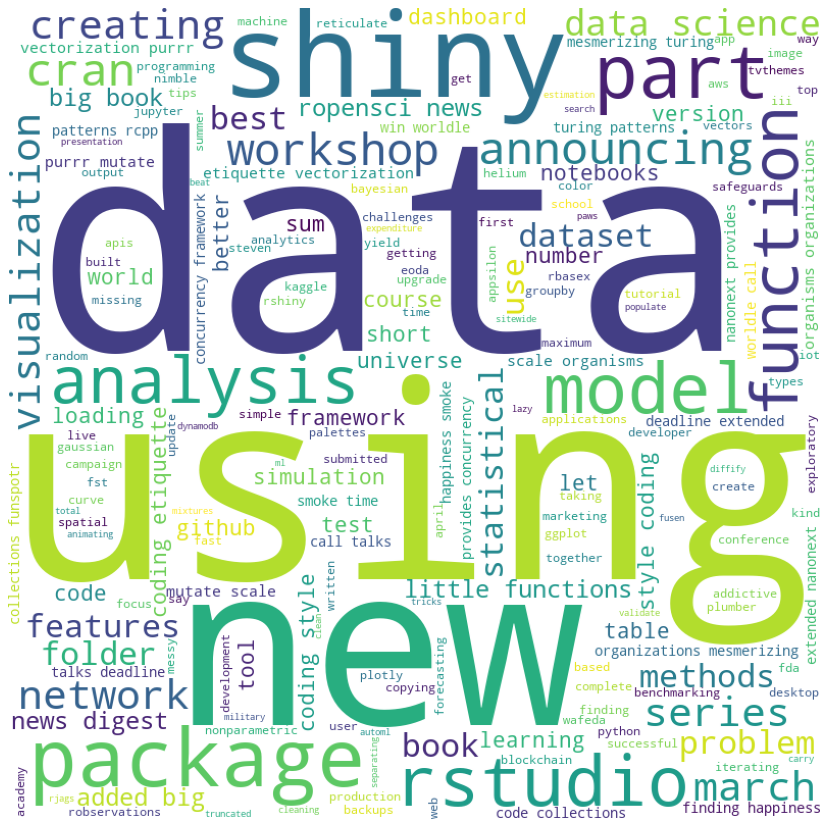

In [39]:
texts = [get_words(t) for t in texts]

fig, ax = plt.subplots(1,1, figsize=(15,15))
wordcloud = WordCloud(stopwords = stopwords_en,
                      height = 800,
                      width = 800,
                      background_color = "white").generate(" ".join(titles))
ax.imshow(wordcloud)
ax.axis("off")

In [41]:
len(texts)

200

In [31]:
article.text


'Rtask, and kindly contributed to Want to share your content on R-bloggers? [This article was first published on, and kindly contributed to R-bloggers ]. (You can report issue about the content on this page here Want to share your content on R-bloggers? click here if you have a blog, or here if you don\'t.\n\nYou can read the original post in its original format on Rtask website by ThinkR here: {fusen} v0.4 – 14 developers tips and tricks\n\nIf you think {fusen} is not for you because you’ve been building R packages your entire life without it, it’s time to give it a try! Refer to the new tips and tricks in the dedicated vignette in case you feel you need additional functionalities: chances are I already implemented them…\n\nGo back to the previous blog post to know how to start with {fusen}: https://rtask.thinkr.fr/fusen-v0-3-better-project-templates-grouped-functions-and-numerous-other-enhancements/\n\nBelow News, you will see the content of the vignette ‘Tips & Tricks’ in {fusen} 0.

In [33]:
article.images

{'https://i0.wp.com/rtask.thinkr.fr/wp-content/uploads/thinkr-hex-fusen-1-887x1024.png?resize=162%2C186&ssl=1',
 'https://i1.wp.com/www.r-bloggers.com/wp-content/uploads/2020/07/RBloggers_feedburner_count_2020_07_01-e1593671704447.gif?w=578&ssl=1',
 'https://rtask.thinkr.fr/wp-content/uploads/thinkr-hex-fusen-1-887x1024.png',
 'https://www.r-bloggers.com/wp-content/uploads/2020/07/R_02.webp',
 'https://www.r-bloggers.com/wp-includes/images/rss.png'}